In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split


In [2]:
import plotly.figure_factory as ff
import re
import string
from collections import Counter
import plotly.express as px
import spacy

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import re

In [4]:
df_train = pd.read_csv('/kaggle/input/data-cnn/train.csv')
df_test = pd.read_csv('/kaggle/input/data-cnn/test.csv')
print(df_train.shape)
print(df_test.shape)

(27481, 4)
(3534, 3)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [6]:
df_train.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


In [7]:
df_train.dropna(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB


# Data Exploration

In [9]:
df_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [10]:
df_train.tail()

,textID,text,selected_text,sentiment
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive
27480,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral


In [11]:
df_test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [12]:
# Count each Sentiment
temp = df_train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text', ascending=False)  
temp

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


Text(0.5, 1.0, 'Train data')

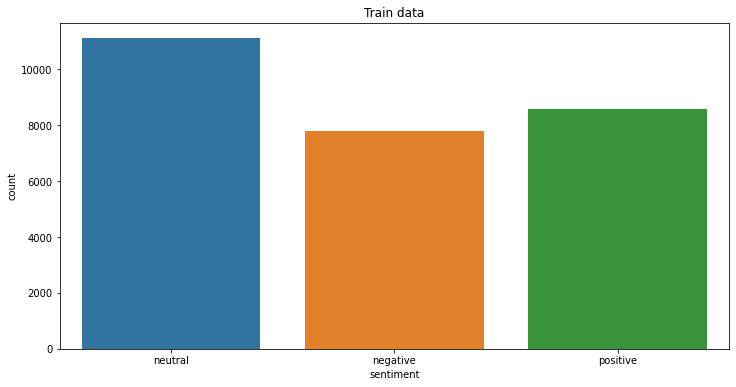

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', data=df_train).set_title('Train data')

Text(0.5, 1.0, 'Test data')

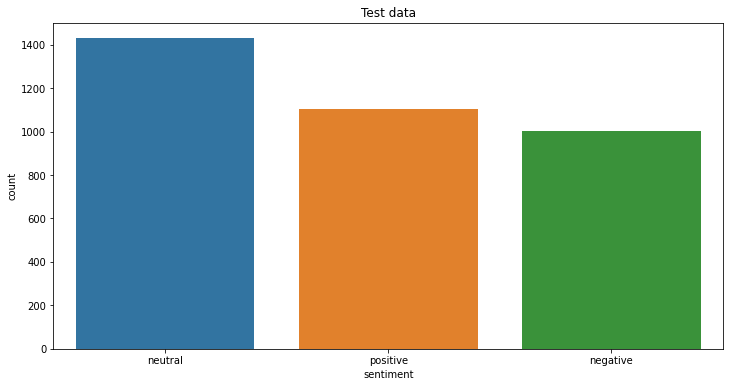

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', data=df_test).set_title('Test data')

In [15]:
# Number of words in selected text
df_train['words_ST'] = df_train['selected_text'].apply(lambda x:len(str(x).split()))

# Number of words in text
df_train['words_Text'] = df_train['text'].apply(lambda x:len(str(x).split()))

# Difference in number of words in text and selected text
df_train['word_difference'] = df_train['words_Text'] - df_train['words_ST']

In [16]:
df_train.head()

,textID,text,selected_text,sentiment,words_ST,words_Text,word_difference
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,3,14,11


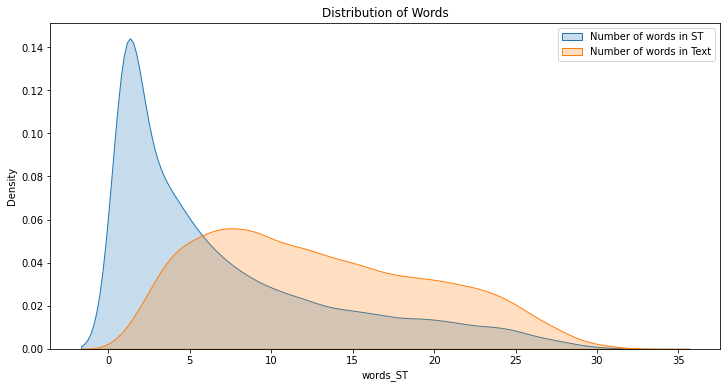

In [17]:
plt.figure(figsize=(12, 6))
p1 = sns.kdeplot(df_train['words_ST'], shade=True, label='Number of words in ST').set_title('Distribution of Words')

p1 = sns.kdeplot(df_train['words_Text'], shade=True, label='Number of words in Text')
plt.legend()

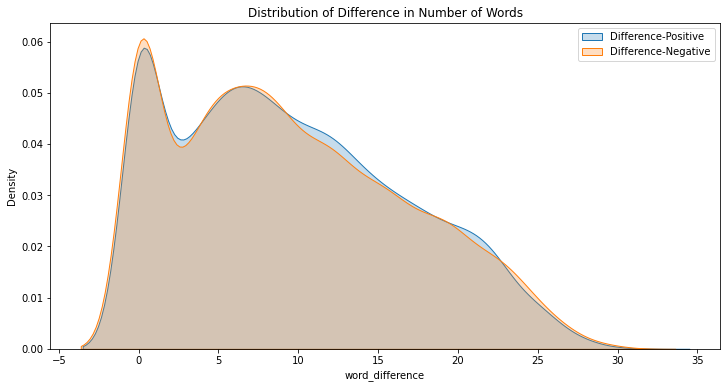

In [18]:
plt.figure(figsize=(12, 6))
p1 = sns.kdeplot(df_train[df_train['sentiment']=='positive']['word_difference'], shade=True, label='Difference-Positive').set_title('Distribution of Difference in Number of Words')
p1 = sns.kdeplot(df_train[df_train['sentiment']=='negative']['word_difference'], shade=True, label='Difference-Negative')
#p1 = sns.kdeplot(df_train[df_train['sentiment']=='neutral']['word_difference'], shade=True, label='Difference-Neutral')
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Difference in Number of Words-neutral')

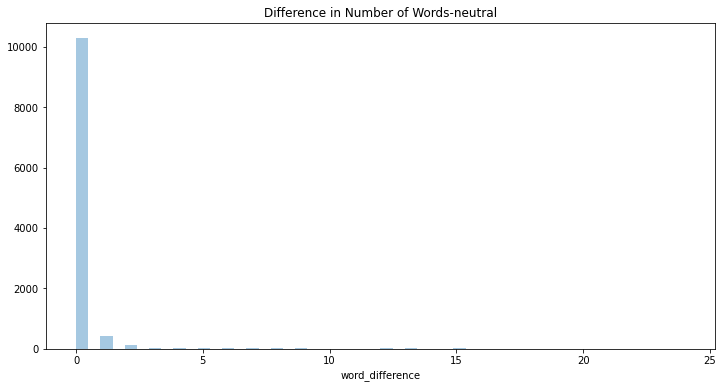

In [19]:
plt.figure(figsize=(12, 6))
sns.distplot(df_train[df_train['sentiment']=='neutral']['word_difference'], kde=False).set_title('Difference in Number of Words-neutral')

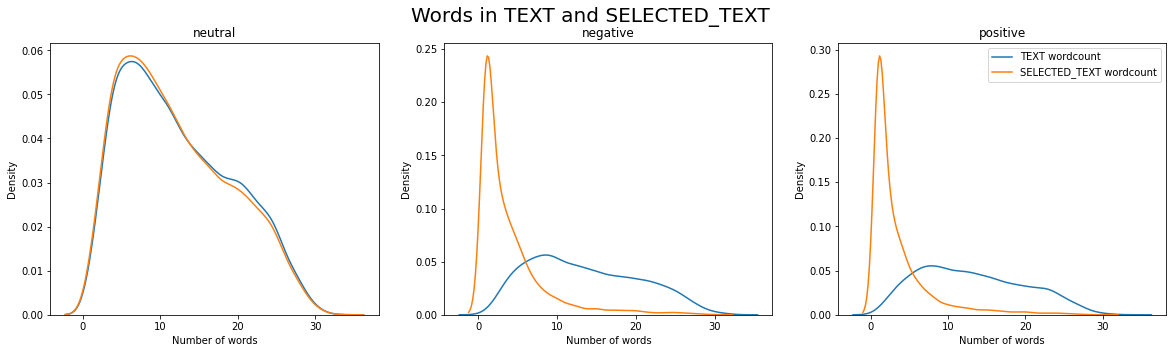

In [20]:
sentiments = ['neutral', 'negative', 'positive']
fig,ax = plt.subplots(nrows = 1, ncols = len(sentiments), figsize = (20,5))

for i, sentiment in enumerate(sentiments):
    plot2 = sns.kdeplot(df_train[df_train['sentiment'] == sentiment]['words_Text'],
                        ax = ax[i],label = 'TEXT wordcount').set_title(sentiment) 
    plot2 = sns.kdeplot(df_train[df_train['sentiment'] == sentiment]['words_ST'],  
                        ax = ax[i], label = 'SELECTED_TEXT wordcount') 
    ax[i].set_xlabel('Number of words')
    cache = plt.legend() 

fig.suptitle('Words in TEXT and SELECTED_TEXT', fontsize = 20)

params_figs = {
    'figure.titlesize': 18, # Fontsize of plot title / fig.suptitle
    'axes.titlesize': 14,   # Fontsize of the axes title
    'axes.labelsize': 14,   # Fontsize of the x and y labels    
    'xtick.labelsize': 14,  # Fontsize of the tick labels
    'ytick.labelsize': 14,  # Fontsize of the tick labels
    'legend.fontsize': 14,  # Fontsize for legends (plt.legend(), fig.legend())
}

plt.rcParams.update(params_figs)

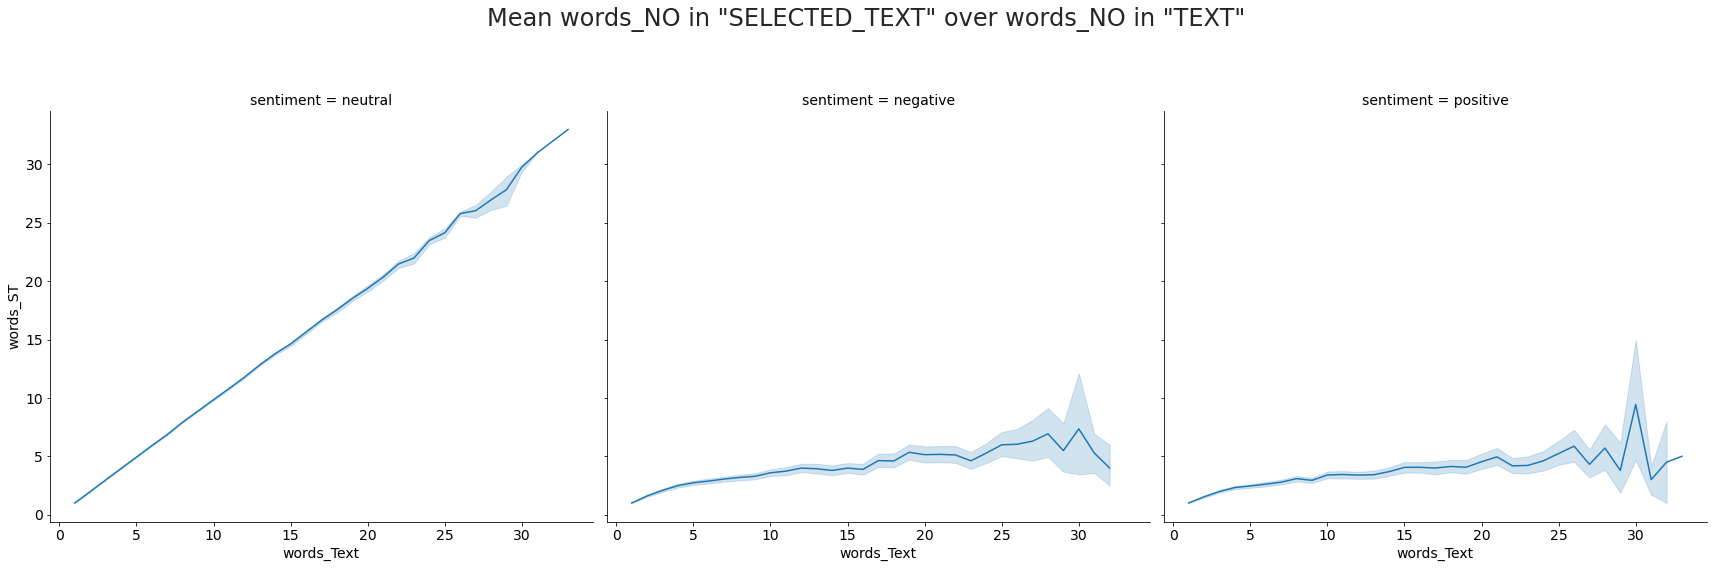

In [21]:
grid = sns.FacetGrid(df_train, col = 'sentiment', height = 8)
grid.map(sns.lineplot, 'words_Text', 'words_ST', estimator = 'mean')
grid.add_legend() 
plt.subplots_adjust(top = 0.8)
sns.set(font_scale = 2) 
cache = grid.fig.suptitle('Mean words_NO in "SELECTED_TEXT" over words_NO in "TEXT"', fontsize = 24)

In [22]:
df_train[df_train['words_Text']<=2]

,textID,text,selected_text,sentiment,words_ST,words_Text,word_difference
7,50e14c0bb8,Soooo high,Soooo high,neutral,2,2,0
26,852edc3769,I`m sorry.,I`m sorry.,negative,2,2,0
42,2e7082d1c8,MAYDAY?!,MAYDAY?!,neutral,1,1,0
61,a4b0888da6,haha yes,haha yes,neutral,2,2,0
68,fa2654e730,Chilliin,Chilliin,positive,1,1,0
...,...,...,...,...,...,...,...
27252,a68443a78b,This year,This year,neutral,2,2,0
27281,adb7ab12f3,stop itt!,stop itt!,neutral,2,2,0
27293,47c474aaf1,Good choice,Good,positive,1,2,1
27422,b3270b06a3,"Plan, successful?","Plan, successful?",neutral,2,2,0


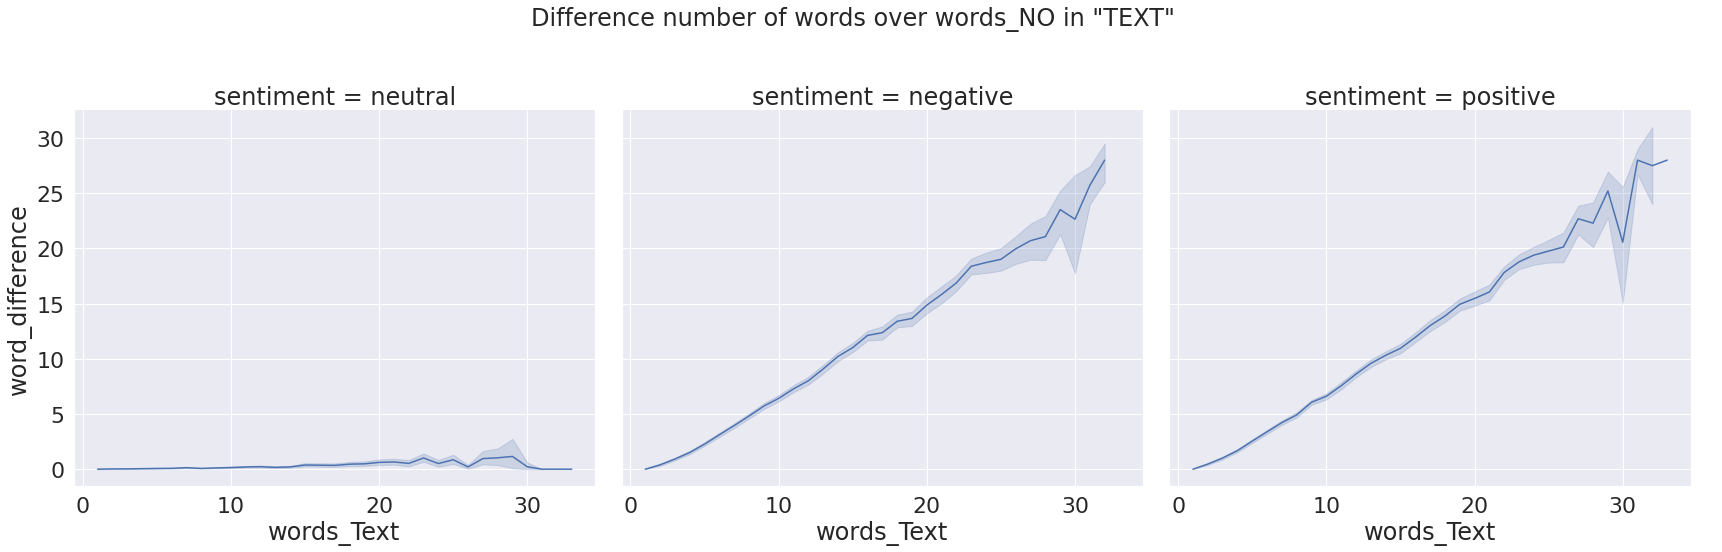

In [23]:
grid = sns.FacetGrid(df_train, col = 'sentiment', height = 8)
grid.map(sns.lineplot, 'words_Text', 'word_difference', estimator = 'mean')
grid.add_legend() 
plt.subplots_adjust(top = 0.8)
sns.set(font_scale = 2) 
cache = grid.fig.suptitle('Difference number of words over words_NO in "TEXT"', fontsize = 24)

In [24]:
'''import plotly.graph_objects as go
fig_box = go.Figure()

for _, sentiment in enumerate(sentiments):
    # CHANGE HERE! You can change "Diff_len_text_selected_text" in below line to 
    # "TEXT_number_of_words" or "SELECTED_TEXT_number_of_words" to get the respective boxplots.  
    fig_box.add_trace(go.Box(y = df_train[df_train['sentiment'] == sentiment]['word_difference'], name = sentiment)) 

title_text = 'Boxplot diagram difference in len(text) and len(selected_text)'
fig_box.update_layout(title = {'text': title_text})
          
fig_box.show()'''

'import plotly.graph_objects as go\nfig_box = go.Figure()\n\nfor _, sentiment in enumerate(sentiments):\n    # CHANGE HERE! You can change "Diff_len_text_selected_text" in below line to \n    # "TEXT_number_of_words" or "SELECTED_TEXT_number_of_words" to get the respective boxplots.  \n    fig_box.add_trace(go.Box(y = df_train[df_train[\'sentiment\'] == sentiment][\'word_difference\'], name = sentiment)) \n\ntitle_text = \'Boxplot diagram difference in len(text) and len(selected_text)\'\nfig_box.update_layout(title = {\'text\': title_text})\n          \nfig_box.show()'

# Data processing

In [25]:
df_train

,textID,text,selected_text,sentiment,words_ST,words_Text,word_difference
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,7,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,2,10,8
2,088c60f138,my boss is bullying me...,bullying me,negative,2,5,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,3,5,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,3,14,11
...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,2,16,14
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,3,23,20
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,6,22,16
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,6,6,0


## Text

In [26]:
df_train['text']=df_train['text'].str.lower()

In [27]:
# Remove all urls
urls = r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
df_train['text']=df_train['text'].map(lambda char:re.sub(urls, "", char))

In [28]:
# Remove all numbers
df_train['text']=df_train['text'].map(lambda s:''.join([i for i in s if not i.isdigit()]))

In [29]:
df_train['text']=df_train['text'].map(lambda char:re.sub(r'^\s*|\s\s*', ' ', char).strip())

In [30]:
# Remove all Punc.
df_train['text']=df_train['text'].str.replace(r'[^\w\s]+', '')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [31]:
# Remove special char
df_train['text']= df_train['text'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [32]:
import unicodedata
df_train['text']= df_train['text'].map(lambda char:unicodedata.normalize('NFKD', char).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

## Selected Text

In [33]:
df_train['selected_text']=df_train['selected_text'].str.lower()
# Remove all urls
urls = r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))'''
df_train['selected_text']=df_train['selected_text'].map(lambda char:re.sub(urls, "", char))
# Remove all numbers
df_train['selected_text']=df_train['selected_text'].map(lambda s:''.join([i for i in s if not i.isdigit()]))
df_train['selected_text']=df_train['selected_text'].map(lambda char:re.sub(r'^\s*|\s\s*', ' ', char).strip())
# Remove all Punc.
df_train['selected_text']=df_train['selected_text'].str.replace(r'[^\w\s]+', '')
# Remove special char
df_train['selected_text']= df_train['selected_text'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()
df_train['selected_text']= df_train['selected_text'].map(lambda char:unicodedata.normalize('NFKD', char).encode('ascii', 'ignore').decode('utf-8', 'ignore'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == "__main__":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [34]:
'''from autocorrect import Speller
spell = Speller(lang="en")
tokenizer = RegexpTokenizer(r'\w+')

df_train.text = df_train.text.map(lambda x:tokenizer.tokenize(x))  #remove punctuation and tokenize
df_train.text = df_train.text.map(lambda x:[spell(i) for i in x])  #spell check'''

'from autocorrect import Speller\nspell = Speller(lang="en")\ntokenizer = RegexpTokenizer(r\'\\w+\')\n\ndf_train.text = df_train.text.map(lambda x:tokenizer.tokenize(x))  #remove punctuation and tokenize\ndf_train.text = df_train.text.map(lambda x:[spell(i) for i in x])  #spell check'

In [35]:
df_train

,textID,text,selected_text,sentiment,words_ST,words_Text,word_difference
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,7,7,0
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,2,10,8
2,088c60f138,my boss is bullying me,bullying me,negative,2,5,3
3,9642c003ef,what interview leave me alone,leave me alone,negative,3,5,2
4,358bd9e861,sons of why couldnt they put them on the rele...,sons of,negative,3,14,11
...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on denver husband los...,d lost,negative,2,16,14
27477,4f4c4fc327,ive wondered about rake to the client has made...,dont force,negative,3,23,20
27478,f67aae2310,yay good for both of you enjoy the break you ...,yay good for both of you,positive,6,22,16
27479,ed167662a5,but it was worth it,but it was worth it,positive,6,6,0


# Models

In [36]:
import gensim
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api
from tensorflow.keras.utils import to_categorical
import keras
from time import time
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [37]:
from keras.models import Sequential
from keras import regularizers
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D
from keras import layers
from sklearn.metrics import accuracy_score, f1_score
from keras.models import load_model

In [38]:
# Text
df = df_train
df['text'] = df['text'].map(lambda x:str(x))
df['sentiment'] = df_train['sentiment'].astype("category")
df['sentiment'] = df_train['sentiment'].cat.codes
# df

In [39]:
df_train

,textID,text,selected_text,sentiment,words_ST,words_Text,word_difference
0,cb774db0d1,id have responded if i were going,id have responded if i were going,1,7,7,0
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,0,2,10,8
2,088c60f138,my boss is bullying me,bullying me,0,2,5,3
3,9642c003ef,what interview leave me alone,leave me alone,0,3,5,2
4,358bd9e861,sons of why couldnt they put them on the rele...,sons of,0,3,14,11
...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on denver husband los...,d lost,0,2,16,14
27477,4f4c4fc327,ive wondered about rake to the client has made...,dont force,0,3,23,20
27478,f67aae2310,yay good for both of you enjoy the break you ...,yay good for both of you,2,6,22,16
27479,ed167662a5,but it was worth it,but it was worth it,2,6,6,0


In [40]:
df_test

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,416863ce47,All alone in this old house again. Thanks for...,positive
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive


In [41]:
x_train, x_test, y_train, y_test = train_test_split(df['text'].values, df['sentiment'].values,stratify=df['sentiment'].values, test_size=0.3,random_state=1)
y_train = to_categorical(y_train)

# x_test, x_val , y_test, y_val = train_test_split(x_test, y_test,stratify=y_test, test_size=0.5,random_state=1)
x_val = x_test[0:4122]
y_val = to_categorical(y_test[0:4122])
x_test = x_test[4122:]
y_test = y_test[4122:]

print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))
print("X_val shape  : {}".format(x_val.shape))
print("y val shape  : {}".format(y_val.shape))


X_train shape: (19236,)
y_train shape: (19236, 3)
X_test shape : (4122,)
y_test shape : (4122,)
X_val shape  : (4122,)
y val shape  : (4122, 3)


### Tokenized data
Our input data is text and we can't feed it directly to our models. So, we'll define a Tokenizer to convert our text input data into token indices. This means that every token (we can decide what a token is char, word, sub-word, etc.) is mapped to a unique index which allows us to represent our text as an array of indices.

In [42]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df.text.values)

X_train = tokenizer.texts_to_sequences(x_train)
X_val = tokenizer.texts_to_sequences(x_val)
X_test = tokenizer.texts_to_sequences(x_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

#  All sequences in a list have the same length no more than 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen) 
X_val = pad_sequences(X_val, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

word_index = tokenizer.word_index

In [43]:
activation = ["selu", "elu", "sigmoid", "tanh"]
optimizer = ["adam", "SGD", "RMSprop", "Adadelta"]
epochs = [5,10,15,20]
batchsize = [8,16,32,64,128]

In [44]:
# Ref: https://www.kaggle.com/code/imabhilash/twitter-sentiment-analysis-using-cnn-deeplearning#Building-deep-learn-model
def cnn(activation,optimizer,epochs,batchsize):
    embedding_dim = 100

    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, 
                          output_dim=embedding_dim,
                          input_length=maxlen))

    model.add(Conv1D(32, kernel_size=3, activation=activation))
    model.add(layers.MaxPooling1D(3))
    model.add(Conv1D(64, kernel_size=3, activation=activation))
    model.add(layers.MaxPooling1D(3))
    model.add(Conv1D(128, kernel_size=3, activation=activation))
    model.add(layers.GlobalMaxPooling1D())


    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(X_val, y_val),
                    batch_size=batchsize)
  
    return history, model

2022-12-24 16:30:29.486523: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-24 16:30:29.729944: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


129/129 [==============================] - 1s 4ms/step - loss: 1.1857 - accuracy: 0.6582
best activation function is  sigmoid
129/129 [==============================] - 0s 4ms/step - loss: 1.0842 - accuracy: 0.4131
best optimizer is  adam
129/129 [==============================] - 0s 4ms/step - loss: 2.1101 - accuracy: 0.5881
best epoch is  10
129/129 [==============================] - 1s 4ms/step - loss: 0.9003 - accuracy: 0.6817
best batchsize is  128
test accuracy score =  0.6838913148956817
test f1 score =  0.6832345383021194
time taken is  63.4867947101593


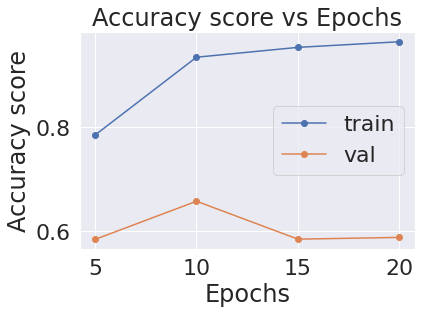

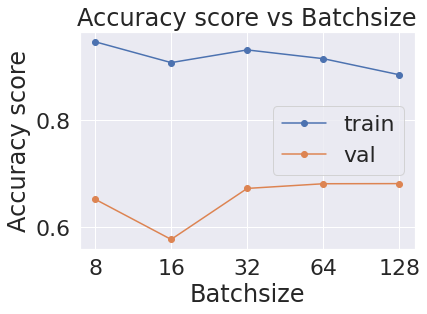

In [45]:
def select_hyperparameters():
    """
    function to select the best activation function, optimizer, epochs, and batch size
    """
    # dictionary to store the validation accuracy of different activation functions
    sel_activation = {}
    # iterate over different activation functions
    for i in activation:
        # build and train the model with current activation function
        history, model = cnn(i, "adam", 5, 16)
        # evaluate the model on the validation data
        val_acc = {i:model.evaluate(X_val,y_val)[1]}
        sel_activation.update(val_acc )
        keras.backend.clear_session()
    # select the best activation function 
    sel_activation_final = max(sel_activation, key=sel_activation.get)
    print("best activation function is ",sel_activation_final)
    # dictionary to store the validation accuracy of different optimizers
    sel_optimizer = {}
    for i in optimizer:# iterate over different optimizers
        # build and train the model with the current optimizer
        history, model = cnn(sel_activation_final,i,5,16)
        # evaluate the model on the validation data
        val_acc  = {i:model.evaluate(X_val,y_val)[1]}
        sel_optimizer.update(val_acc)
        keras.backend.clear_session()
    # select the best optimizer
    sel_optimizer_final = max(sel_optimizer, key=sel_optimizer.get)
    print("best optimizer is ",sel_optimizer_final)

    acc_train_epoch = {}
    acc_val_epoch = {}
    for i in epochs:# iterate over different number of epochs
        history, model = cnn(sel_activation_final,sel_optimizer_final,i,16)
        temp_train = {i:model.evaluate(X_train,y_train)[1]}
        temp_val = {i:model.evaluate(X_val,y_val)[1]}
        acc_train_epoch.update(temp_train)
        acc_val_epoch.update(temp_val)
        keras.backend.clear_session()
    # select the best number of epochs
    sel_epoch_final = max(acc_val_epoch, key=acc_val_epoch.get)
    print("best epoch is ",sel_epoch_final)

    acc_train_batch = {}
    acc_val_batch = {}
    for i in batchsize:
        history, model = cnn(sel_activation_final,sel_optimizer_final,sel_epoch_final,i)
        temp_train = {i:model.evaluate(X_train,y_train)[1]}
        temp_val = {i:model.evaluate(X_val,y_val)[1]}
        acc_train_batch.update(temp_train)
        acc_val_batch.update(temp_val)
        keras.backend.clear_session()
    # select the best batch size
    sel_batch_final = max(acc_val_batch, key=acc_val_batch.get)
    print("best batchsize is ",sel_batch_final)

    df_batch_train = pd.DataFrame(list(acc_train_batch.items()), columns=['Batchsize', 'Accuracy score'])
    df_batch_val = pd.DataFrame(list(acc_val_batch.items()), columns=['Batchsize', 'Accuracy score'])

    df_batch_val.Batchsize = df_batch_val.Batchsize.map(lambda x:str(x))
    df_batch_train.Batchsize = df_batch_train.Batchsize.map(lambda x:str(x))

    plt.figure()
    plt.plot(df_batch_train.iloc[:,0],df_batch_train.iloc[:,1],label="train", marker='o')
    plt.plot(df_batch_val.iloc[:,0],df_batch_val.iloc[:,1],label = "val", marker='o')
    plt.title("Accuracy score vs Batch size")
    plt.ylabel("Accuracy score")
    plt.xlabel("Batch size")
    plt.legend()

    #final model
    final_model, final_history = cnn(sel_activation_final,sel_optimizer_final,sel_epoch_final,sel_batch_final)



# 5. best model
t0 = time()
select_hyperparameters()
pred = np.argmax(model.predict(X_test), axis=-1)
print("test accuracy score = ",accuracy_score(y_pred=pred, y_true=y_test))
t1 = time()
print("time taken is ", t1-t0)

In [46]:
def cnn(activation,optimizer,epochs,batchsize):
    embedding_dim = 100

    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))

    model.add(Conv1D(32, kernel_size=2, activation=activation))
    model.add(layers.MaxPooling1D(2))
    model.add(Conv1D(32, kernel_size=2, activation=activation))
    model.add(Dropout(0.25))
    model.add(Conv1D(16, kernel_size=2, activation=activation))
    model.add(layers.MaxPooling1D(2))
    model.add(Conv1D(16, kernel_size=2, activation=activation))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_data=(X_val, y_val), batch_size=batchsize)
  
    return history, model

129/129 [==============================] - 1s 4ms/step - loss: 0.9960 - accuracy: 0.6555
best activation function is  selu
129/129 [==============================] - 1s 4ms/step - loss: 1.0841 - accuracy: 0.4141
best optimizer is  RMSprop
129/129 [==============================] - 1s 4ms/step - loss: 1.4428 - accuracy: 0.6101
best epoch is  5
129/129 [==============================] - 1s 4ms/step - loss: 0.8787 - accuracy: 0.6611
best batchsize is  16
test accuracy score =  0.6977195536147501
test f1 score =  0.6977627533722041
time taken is  86.64184832572937


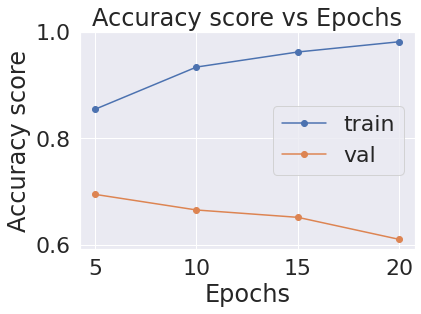

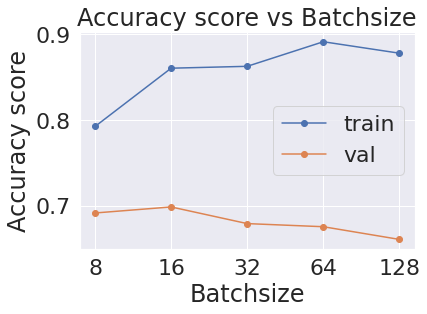

In [47]:
def select_hyperparameters():
    """
    function to select the best activation function, optimizer, epochs, and batch size
    """
    # dictionary to store the validation accuracy of different activation functions
    sel_activation = {}
    # iterate over different activation functions
    for i in activation:
        # build and train the model with current activation function
        history, model = cnn(i, "adam", 5, 16)
        # evaluate the model on the validation data
        val_acc = {i:model.evaluate(X_val,y_val)[1]}
        sel_activation.update(val_acc )
        keras.backend.clear_session()
    # select the best activation function 
    sel_activation_final = max(sel_activation, key=sel_activation.get)
    print("best activation function is ",sel_activation_final)
    # dictionary to store the validation accuracy of different optimizers
    sel_optimizer = {}
    for i in optimizer:# iterate over different optimizers
        # build and train the model with the current optimizer
        history, model = cnn(sel_activation_final,i,5,16)
        # evaluate the model on the validation data
        val_acc  = {i:model.evaluate(X_val,y_val)[1]}
        sel_optimizer.update(val_acc)
        keras.backend.clear_session()
    # select the best optimizer
    sel_optimizer_final = max(sel_optimizer, key=sel_optimizer.get)
    print("best optimizer is ",sel_optimizer_final)

    acc_train_epoch = {}
    acc_val_epoch = {}
    for i in epochs:# iterate over different number of epochs
        history, model = cnn(sel_activation_final,sel_optimizer_final,i,16)
        temp_train = {i:model.evaluate(X_train,y_train)[1]}
        temp_val = {i:model.evaluate(X_val,y_val)[1]}
        acc_train_epoch.update(temp_train)
        acc_val_epoch.update(temp_val)
        keras.backend.clear_session()
    # select the best number of epochs
    sel_epoch_final = max(acc_val_epoch, key=acc_val_epoch.get)
    print("best epoch is ",sel_epoch_final)

    acc_train_batch = {}
    acc_val_batch = {}
    for i in batchsize:
        history, model = cnn(sel_activation_final,sel_optimizer_final,sel_epoch_final,i)
        temp_train = {i:model.evaluate(X_train,y_train)[1]}
        temp_val = {i:model.evaluate(X_val,y_val)[1]}
        acc_train_batch.update(temp_train)
        acc_val_batch.update(temp_val)
        keras.backend.clear_session()
    # select the best batch size
    sel_batch_final = max(acc_val_batch, key=acc_val_batch.get)
    print("best batchsize is ",sel_batch_final)

    df_batch_train = pd.DataFrame(list(acc_train_batch.items()), columns=['Batchsize', 'Accuracy score'])
    df_batch_val = pd.DataFrame(list(acc_val_batch.items()), columns=['Batchsize', 'Accuracy score'])

    df_batch_val.Batchsize = df_batch_val.Batchsize.map(lambda x:str(x))
    df_batch_train.Batchsize = df_batch_train.Batchsize.map(lambda x:str(x))

    plt.figure()
    plt.plot(df_batch_train.iloc[:,0],df_batch_train.iloc[:,1],label="train", marker='o')
    plt.plot(df_batch_val.iloc[:,0],df_batch_val.iloc[:,1],label = "val", marker='o')
    plt.title("Accuracy score vs Batch size")
    plt.ylabel("Accuracy score")
    plt.xlabel("Batch size")
    plt.legend()

    #final model
    final_model, final_history = cnn(sel_activation_final,sel_optimizer_final,sel_epoch_final,sel_batch_final)



# 5. best model
t0 = time()
select_hyperparameters()
pred = np.argmax(model.predict(X_test), axis=-1)
print("test accuracy score = ",accuracy_score(y_pred=pred, y_true=y_test))
t1 = time()
print("time taken is ", t1-t0)

In [48]:
def cnn(activation,optimizer,epochs,batchsize):
    embedding_dim = 100

    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))

    model.add(Conv1D(32, kernel_size=2, activation=activation))
    model.add(layers.MaxPooling1D(2))
    model.add(Conv1D(32, kernel_size=2, activation=activation))
    model.add(Dropout(0.25))
    model.add(Conv1D(16, kernel_size=2, activation=activation))
    model.add(layers.MaxPooling1D(2))
    model.add(Conv1D(16, kernel_size=2, activation=activation))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0, validation_data=(X_val, y_val), batch_size=batchsize)
  
    return history, model

129/129 [==============================] - 1s 5ms/step - loss: 0.9397 - accuracy: 0.6655
best activation function is  tanh
129/129 [==============================] - 1s 5ms/step - loss: 1.0841 - accuracy: 0.4131
best optimizer is  RMSprop
129/129 [==============================] - 1s 4ms/step - loss: 1.6688 - accuracy: 0.6266
best epoch is  5
129/129 [==============================] - 1s 4ms/step - loss: 0.9671 - accuracy: 0.6652
best batchsize is  8
test accuracy score =  0.6868025230470646
test f1 score =  0.686128563253832
time taken is  174.64402174949646


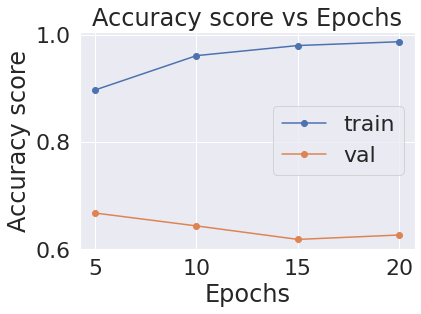

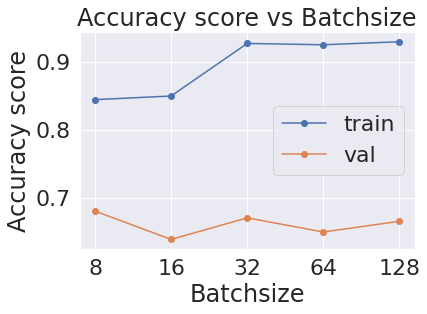

In [49]:
def select_hyperparameters():
    """
    function to select the best activation function, optimizer, epochs, and batch size
    """
    # dictionary to store the validation accuracy of different activation functions
    sel_activation = {}
    # iterate over different activation functions
    for i in activation:
        # build and train the model with current activation function
        history, model = cnn(i, "adam", 5, 16)
        # evaluate the model on the validation data
        val_acc = {i:model.evaluate(X_val,y_val)[1]}
        sel_activation.update(val_acc )
        keras.backend.clear_session()
    # select the best activation function 
    sel_activation_final = max(sel_activation, key=sel_activation.get)
    print("best activation function is ",sel_activation_final)
    # dictionary to store the validation accuracy of different optimizers
    sel_optimizer = {}
    for i in optimizer:# iterate over different optimizers
        # build and train the model with the current optimizer
        history, model = cnn(sel_activation_final,i,5,16)
        # evaluate the model on the validation data
        val_acc  = {i:model.evaluate(X_val,y_val)[1]}
        sel_optimizer.update(val_acc)
        keras.backend.clear_session()
    # select the best optimizer
    sel_optimizer_final = max(sel_optimizer, key=sel_optimizer.get)
    print("best optimizer is ",sel_optimizer_final)

    acc_train_epoch = {}
    acc_val_epoch = {}
    for i in epochs:# iterate over different number of epochs
        history, model = cnn(sel_activation_final,sel_optimizer_final,i,16)
        temp_train = {i:model.evaluate(X_train,y_train)[1]}
        temp_val = {i:model.evaluate(X_val,y_val)[1]}
        acc_train_epoch.update(temp_train)
        acc_val_epoch.update(temp_val)
        keras.backend.clear_session()
    # select the best number of epochs
    sel_epoch_final = max(acc_val_epoch, key=acc_val_epoch.get)
    print("best epoch is ",sel_epoch_final)

    acc_train_batch = {}
    acc_val_batch = {}
    for i in batchsize:
        history, model = cnn(sel_activation_final,sel_optimizer_final,sel_epoch_final,i)
        temp_train = {i:model.evaluate(X_train,y_train)[1]}
        temp_val = {i:model.evaluate(X_val,y_val)[1]}
        acc_train_batch.update(temp_train)
        acc_val_batch.update(temp_val)
        keras.backend.clear_session()
    # select the best batch size
    sel_batch_final = max(acc_val_batch, key=acc_val_batch.get)
    print("best batchsize is ",sel_batch_final)

    df_batch_train = pd.DataFrame(list(acc_train_batch.items()), columns=['Batchsize', 'Accuracy score'])
    df_batch_val = pd.DataFrame(list(acc_val_batch.items()), columns=['Batchsize', 'Accuracy score'])

    df_batch_val.Batchsize = df_batch_val.Batchsize.map(lambda x:str(x))
    df_batch_train.Batchsize = df_batch_train.Batchsize.map(lambda x:str(x))

    plt.figure()
    plt.plot(df_batch_train.iloc[:,0],df_batch_train.iloc[:,1],label="train", marker='o')
    plt.plot(df_batch_val.iloc[:,0],df_batch_val.iloc[:,1],label = "val", marker='o')
    plt.title("Accuracy score vs Batch size")
    plt.ylabel("Accuracy score")
    plt.xlabel("Batch size")
    plt.legend()

    #final model
    final_model, final_history = cnn(sel_activation_final,sel_optimizer_final,sel_epoch_final,sel_batch_final)



# 5. best model
t0 = time()
select_hyperparameters()
pred = np.argmax(model.predict(X_test), axis=-1)
print("test accuracy score = ",accuracy_score(y_pred=pred, y_true=y_test))
t1 = time()
print("time taken is ", t1-t0)

In [50]:
import keras
model = keras.models.load_model("network3.h5")

pred = np.argmax(model.predict(X_test), axis=-1)
print("test accuracy score = ",accuracy_score(y_pred=pred, y_true=y_test))
print("test f1 score = ",f1_score(y_pred=pred, y_true=y_test, average="weighted"))

test accuracy score =  0.6868025230470646
test f1 score =  0.686128563253832


In [51]:
# selected_text

df = df_train
df['text'] = df['selected_text'].map(lambda x:str(x))
df['sentiment'] = df_train['sentiment'].astype("category")
df['sentiment'] = df_train['sentiment'].cat.codes
# df

In [52]:
def cnn_keras(activation,optimizer,epochs,batchsize):
  embedding_dim = 100

  model = Sequential()
  model.add(layers.Embedding(input_dim=vocab_size, 
                          output_dim=embedding_dim,
                          input_length=maxlen))

  model.add(Conv1D(32, kernel_size=2, activation=activation))
  model.add(layers.MaxPooling1D(2))
  model.add(Conv1D(32, kernel_size=2, activation=activation))
  model.add(Dropout(0.25))
  model.add(Conv1D(16, kernel_size=2, activation=activation))
  model.add(layers.MaxPooling1D(2))
  model.add(Conv1D(16, kernel_size=2, activation=activation))
  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(64, activation='tanh'))
  model.add(Dropout(0.5))

  model.add(Dense(3, activation='softmax'))
  model.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(X_train, y_train,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(X_val, y_val),
                    batch_size=batchsize)
  
  return history, model

129/129 [==============================] - 1s 4ms/step - loss: 0.9978 - accuracy: 0.6676
best activation function is  tanh
129/129 [==============================] - 1s 4ms/step - loss: 1.0869 - accuracy: 0.4131
best optimizer is  RMSprop
129/129 [==============================] - 1s 4ms/step - loss: 1.6849 - accuracy: 0.6359
best epoch is  5
129/129 [==============================] - 1s 4ms/step - loss: 0.8452 - accuracy: 0.6841
best batchsize is  8
test accuracy score =  0.7003881610868511
test f1 score =  0.7009404218384527
time taken is  154.48391127586365


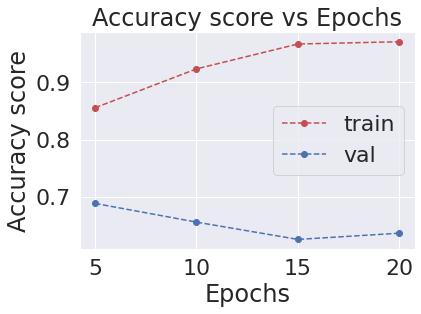

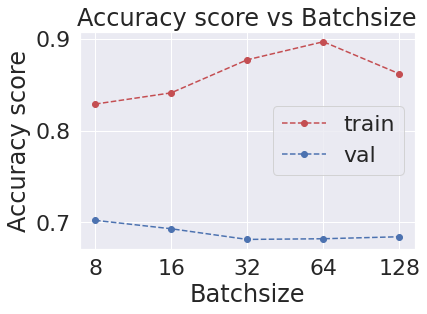

In [53]:
# 1. selecting activation fixing - optimizer = adam, epochs = 5, batch = 16
sel_activation = {}
for i in activation:
  history, model = cnn_keras(i,"adam",5,16)
  temp = {i:model.evaluate(X_val,y_val)[1]}
  sel_activation.update(temp)
  keras.backend.clear_session()

sel_activation_final = max(sel_activation, key=sel_activation.get)
print("best activation function is ",sel_activation_final)

# 2. selecting optimizer by fixing - activation = best, epochs = 5, batch = 16
sel_optimizer = {}
for i in optimizer:
  history, model = cnn_keras(sel_activation_final,i,5,16)
  temp = {i:model.evaluate(X_val,y_val)[1]}
  sel_optimizer.update(temp)
  keras.backend.clear_session()

sel_optimizer_final = max(sel_optimizer, key=sel_optimizer.get)
print("best optimizer is ",sel_optimizer_final)

# 3.  graph epoch vs accuracy score

acc_train_epoch = {}
acc_val_epoch = {}
for i in epochs:
  history, model = cnn_keras(sel_activation_final,sel_optimizer_final,i,16)
  temp_train = {i:model.evaluate(X_train,y_train)[1]}
  temp_val = {i:model.evaluate(X_val,y_val)[1]}
  acc_train_epoch.update(temp_train)
  acc_val_epoch.update(temp_val)
  keras.backend.clear_session()

sel_epoch_final = max(acc_val_epoch, key=acc_val_epoch.get)
print("best epoch is ",sel_epoch_final)

df_epoch_train = pd.DataFrame(list(acc_train_epoch.items()), columns=['Epochs', 'Accuracy score'])
df_epoch_val = pd.DataFrame(list(acc_val_epoch.items()), columns=['Epochs', 'Accuracy score'])

df_epoch_val.Epochs = df_epoch_val.Epochs.map(lambda x:str(x))
df_epoch_train.Epochs = df_epoch_train.Epochs.map(lambda x:str(x))

plt.figure()
plt.plot(df_epoch_train.iloc[:,0],df_epoch_train.iloc[:,1],c="r",label="train",linestyle='--', marker='o')
plt.plot(df_epoch_val.iloc[:,0],df_epoch_val.iloc[:,1],c="b",label = "val",linestyle='--', marker='o')
plt.title("Accuracy score vs Epochs")
plt.ylabel("Accuracy score")
plt.xlabel("Epochs")
plt.legend()


# 4. graph batch size vs accuracy score
acc_train_batch = {}
acc_val_batch = {}
for i in batchsize:
  history, model = cnn_keras(sel_activation_final,sel_optimizer_final,sel_epoch_final,i)
  temp_train = {i:model.evaluate(X_train,y_train)[1]}
  temp_val = {i:model.evaluate(X_val,y_val)[1]}
  acc_train_batch.update(temp_train)
  acc_val_batch.update(temp_val)
  keras.backend.clear_session()

sel_batch_final = max(acc_val_batch, key=acc_val_batch.get)
print("best batchsize is ",sel_batch_final)

df_batch_train = pd.DataFrame(list(acc_train_batch.items()), columns=['Batchsize', 'Accuracy score'])
df_batch_val = pd.DataFrame(list(acc_val_batch.items()), columns=['Batchsize', 'Accuracy score'])

df_batch_val.Batchsize = df_batch_val.Batchsize.map(lambda x:str(x))
df_batch_train.Batchsize = df_batch_train.Batchsize.map(lambda x:str(x))

plt.figure()
plt.plot(df_batch_train.iloc[:,0],df_batch_train.iloc[:,1],c="r",label="train",linestyle='--', marker='o')
plt.plot(df_batch_val.iloc[:,0],df_batch_val.iloc[:,1],c="b",label = "val",linestyle='--', marker='o')
plt.title("Accuracy score vs Batchsize")
plt.ylabel("Accuracy score")
plt.xlabel("Batchsize")
plt.legend()

# 5. best model
t0 = time()
history, model = cnn_keras(sel_activation_final,sel_optimizer_final,sel_epoch_final,sel_batch_final)
pred = np.argmax(model.predict(X_test), axis=-1)
print("test accuracy score = ",accuracy_score(y_pred=pred, y_true=y_test))
print("test f1 score = ",f1_score(y_pred=pred, y_true=y_test, average="weighted"))

t1 = time()
print("time taken is ", t1-t0)
model.save("network3.h5")

In [54]:
import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.load_model("network3.h5")

In [55]:
pred = np.argmax(model.predict(X_test), axis=-1)
print("test accuracy score = ",accuracy_score(y_pred=pred, y_true=y_test))
print("test f1 score = ",f1_score(y_pred=pred, y_true=y_test, average="weighted"))

test accuracy score =  0.7003881610868511
test f1 score =  0.7009404218384527


Text(20.5, 0.5, 'y_pred')

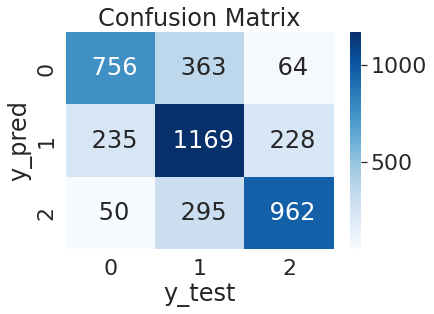

In [56]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [57]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68      1183
           1       0.64      0.72      0.68      1632
           2       0.77      0.74      0.75      1307

    accuracy                           0.70      4122
   macro avg       0.71      0.70      0.70      4122
weighted avg       0.71      0.70      0.70      4122

